<a href="https://colab.research.google.com/github/vrushali1423/ML_Project/blob/main/CLV_AutoInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA**

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
data = pd.read_excel('/content/AutoInsurance.xlsx')

In [ ]:
# Display first five rows
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03 00:00:00,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
# Display column names
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
# Check data shape
data.shape

(9134, 24)

In [ ]:
# Display no. of rows & columns
print(f'Number of rows:',data.shape[0])
print(f'Number of columns:',data.shape[1])

Number of rows: 9134
Number of columns: 24


The dataset contains 9134 rows & 24 columns, including customer details, policy information, and the target variable "Customer Lifetime Value" (CLV)

In [ ]:
# Check summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
#Check missing values
missing_values=data.isnull().sum()
print("Missing values in each column: \n")
missing_values

Missing values in each column: 



,0
Customer,0
State,0
Customer Lifetime Value,0
Response,0
Coverage,0
Education,0
Effective To Date,0
EmploymentStatus,0
Gender,0
Income,0


Convert Categorical to numeric data Steps to Fix: Drop unnecessary columns: Columns like "Customer" (ID) are not useful for prediction. Convert categorical variables: Encode categorical features using one-hot encoding or label encoding. Ensure numerical data types: Convert numeric columns to proper formats
There are no missing values, and the dataset contains a mix of numerical and categorical variables.





In [ ]:
data['Customer Lifetime Value'].value_counts().head()

,count
Customer Lifetime Value,
7200.664877,6
17497.522010,6
2248.449633,6
8092.876960,6
6057.072080,6


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop non-relevant columns
data_clean = data.drop(columns=["Customer", "Effective To Date"])

# Identify categorical and numerical columns
categorical_cols = data_clean.select_dtypes(include=["object"]).columns
numerical_cols = data_clean.select_dtypes(include=["int64", "float64"]).columns

# Apply Label Encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_clean[col] = le.fit_transform(data_clean[col])
    label_encoders[col] = le  # Store encoders for future reference

# Confirm data types after conversion
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   int64  
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   int64  
 3   Coverage                       9134 non-null   int64  
 4   Education                      9134 non-null   int64  
 5   EmploymentStatus               9134 non-null   int64  
 6   Gender                         9134 non-null   int64  
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   int64  
 9   Marital Status                 9134 non-null   int64  
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

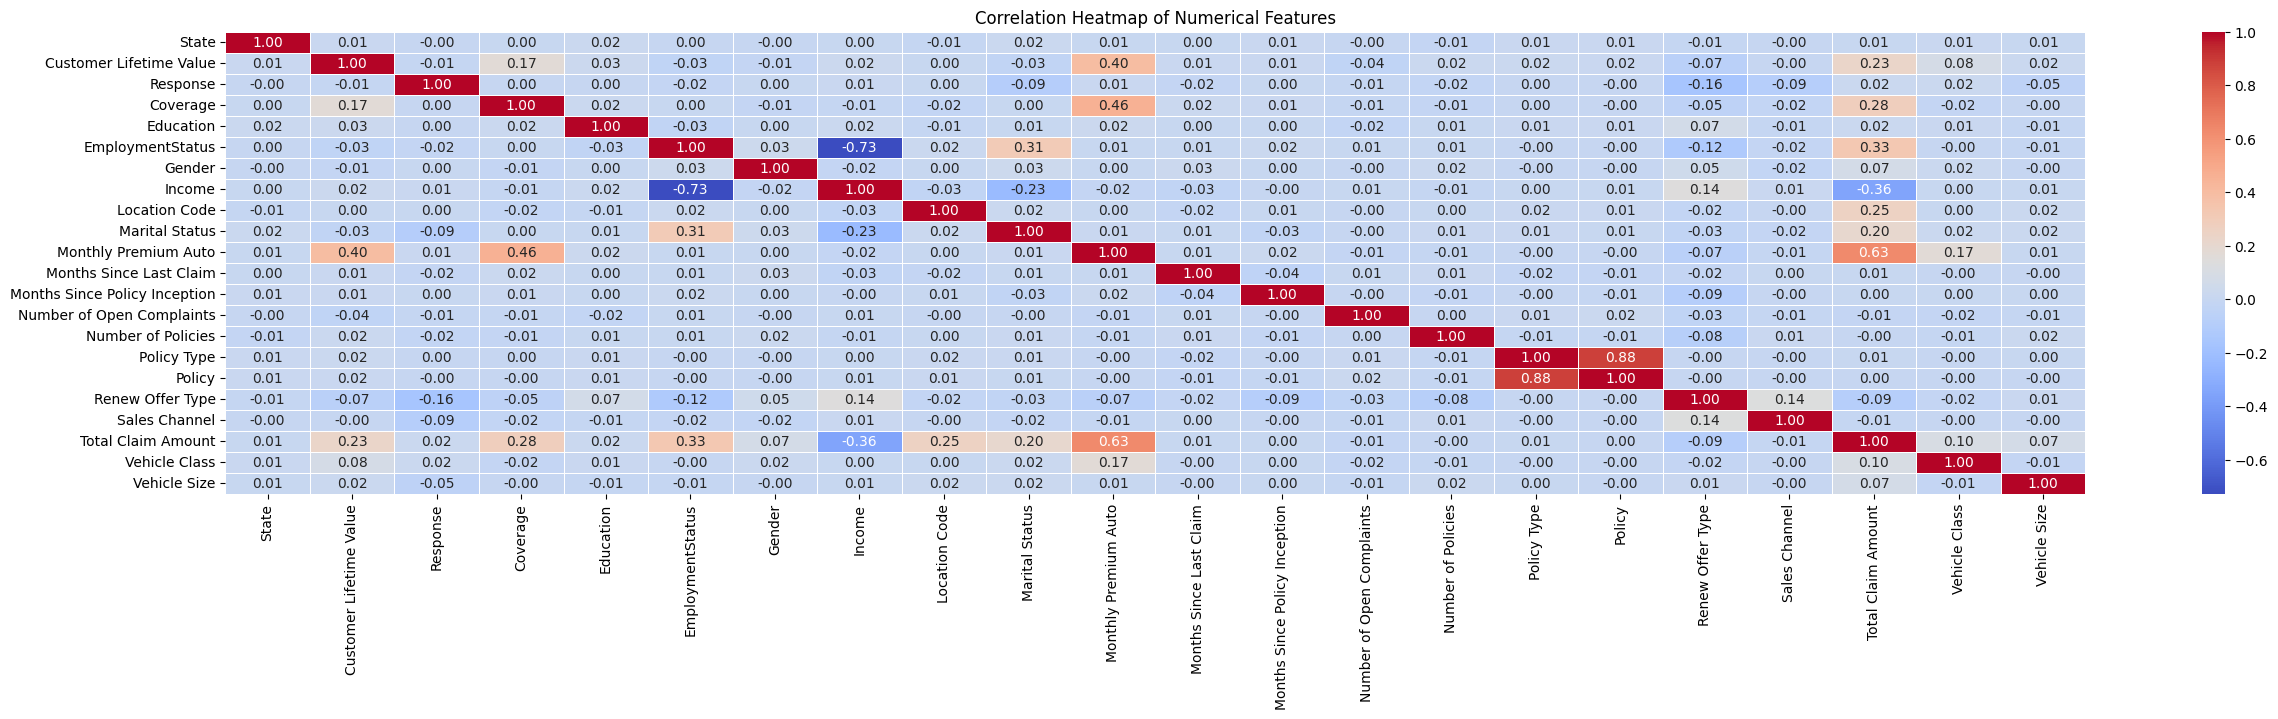

In [ ]:
# Show correlation between Features & Target Variable(CLV)
plt.figure(figsize=(30, 6))
sns.heatmap(data_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The heatmap shows the correlation between numerical features. "Customer Lifetime Value" (CLV) has a noticeable correlation with "Monthly Premium Auto" and "Total Claim Amount." Other numerical variables show weak correlations.

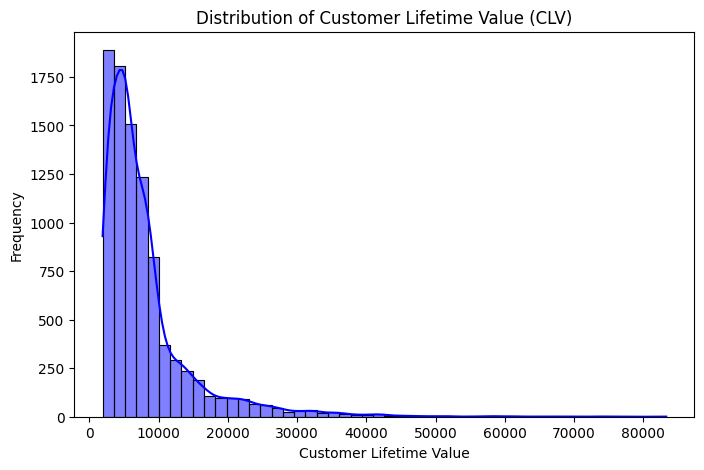

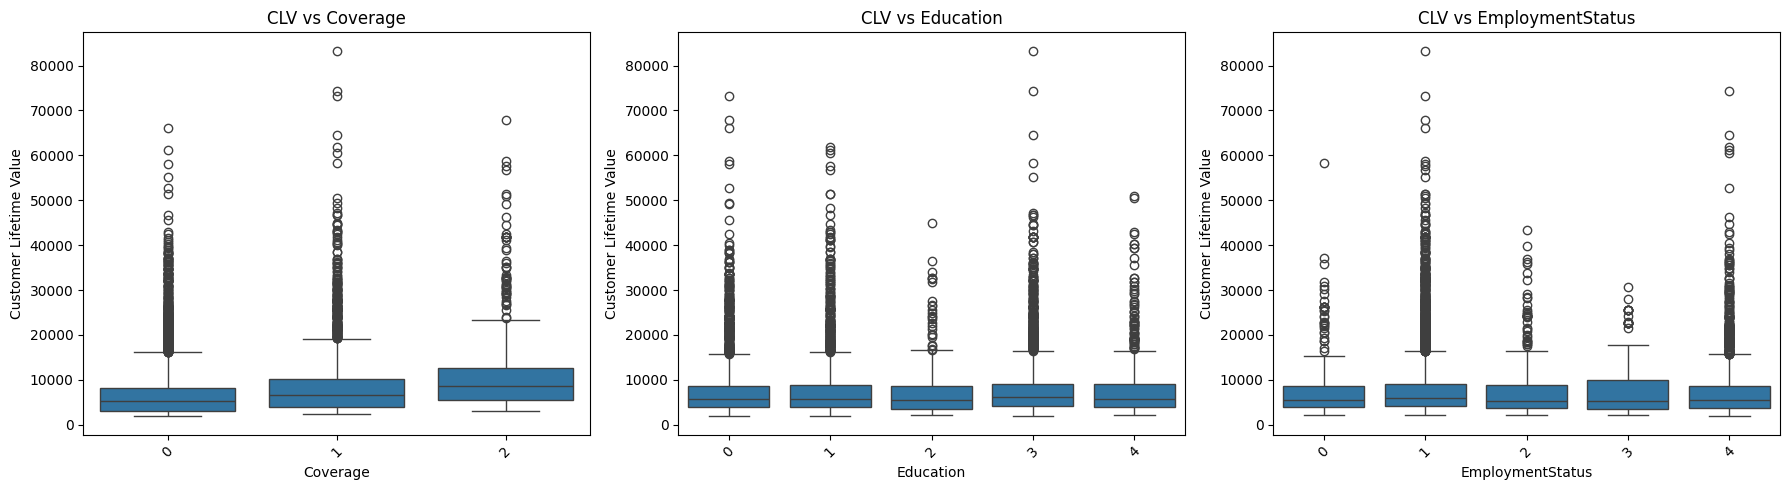

In [ ]:
# Visualizing CLV distribution
plt.figure(figsize=(8, 5))
sns.histplot(data_clean["Customer Lifetime Value"], bins=50, kde=True, color="blue")
plt.title("Distribution of Customer Lifetime Value (CLV)")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Frequency")
plt.show()

# Boxplots for CLV vs Categorical Variables
categorical_features = ["Coverage", "Education", "EmploymentStatus"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=data_clean[feature], y=data_clean["Customer Lifetime Value"], ax=axes[i])
    axes[i].set_title(f"CLV vs {feature}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


The distribution of CLV and its relationship with key categorical variables like "Coverage," "Education," and "Employment Status. The first plot shows that "Customer Lifetime Value" (CLV) is right-skewed, meaning some customers have significantly higher CLV than others. The boxplots reveal how CLV varies across different categorical variables:

1]Coverage: Higher coverage levels tend to be associated with higher CLV. 2]Education: There are some variations in CLV across education levels, but no strong trend. 3]Employment Status: Employed individuals generally have higher CLV than unemployed ones.

**Statistical Tests**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import mannwhitneyu, kruskal

In [ ]:
# Statistical Tests
num_features = data.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove('Customer Lifetime Value')  # Exclude target variable
print("\nOLS Regression for Numerical Features:")
for feature in num_features:
    X = sm.add_constant(data[feature])
    y = data['Customer Lifetime Value']
    model = sm.OLS(y, X).fit()
    print(f"Feature: {feature}")
    print(model.summary())
    print("-"*50)


OLS Regression for Numerical Features:
Feature: Income
                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     5.425
Date:                     Mon, 10 Mar 2025   Prob (F-statistic):             0.0199
Time:                             05:06:34   Log-Likelihood:                -93657.
No. Observations:                     9134   AIC:                         1.873e+05
Df Residuals:                         9132   BIC:                         1.873e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
# Mann-Whitney U and Kruskal-Wallis for Categorical Features
cat_features = data.select_dtypes(include=['object']).columns.tolist()

print("\nStatistical Tests for Categorical Features:")
for feature in cat_features:
    categories = data[feature].unique()
    if len(categories) == 2:
        group1 = data[data[feature] == categories[0]]['Customer Lifetime Value']
        group2 = data[data[feature] == categories[1]]['Customer Lifetime Value']
        stat, p = mannwhitneyu(group1, group2)
        print(f"Mann-Whitney U Test for {feature}: p-value = {p}")
    else:
        groups = [data[data[feature] == cat]['Customer Lifetime Value'] for cat in categories]
        stat, p = kruskal(*groups)
        print(f"Kruskal-Wallis Test for {feature}: p-value = {p}")
    print("-"*50)


Statistical Tests for Categorical Features:
Kruskal-Wallis Test for Customer: p-value = 0.49803212454800355
--------------------------------------------------
Kruskal-Wallis Test for State: p-value = 0.27998232358818953
--------------------------------------------------
Mann-Whitney U Test for Response: p-value = 0.5168872245291198
--------------------------------------------------
Kruskal-Wallis Test for Coverage: p-value = 7.648852917746348e-110
--------------------------------------------------
Kruskal-Wallis Test for Education: p-value = 0.015693004298603028
--------------------------------------------------
Kruskal-Wallis Test for Effective To Date: p-value = 0.014192407816711548
--------------------------------------------------
Kruskal-Wallis Test for EmploymentStatus: p-value = 1.2758458797542519e-08
--------------------------------------------------
Mann-Whitney U Test for Gender: p-value = 0.48749303056449833
--------------------------------------------------
Kruskal-Wallis 

**Build Predictive Model**

In [ ]:
# Prepare data for modeling
data = pd.get_dummies(data, drop_first=True)
X = data.drop(columns=['Customer Lifetime Value'])
y = data['Customer Lifetime Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer_AA11235,Customer_AA16582,Customer_AA30683,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,69,32,5,0,1,384.811147,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,0,94,13,42,0,8,1131.464935,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,48767,108,18,38,0,2,566.472247,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,0,106,18,65,0,7,529.881344,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,43836,73,12,44,0,1,138.130879,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
y.head()

,Customer Lifetime Value
0,2763.519279
1,6979.535903
2,12887.431650
3,7645.861827
4,2813.692575


In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
pip install --upgrade scikit-learn

In [ ]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Compute RMSE manually
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

Linear Regression: RMSE = 6612.7813, R² = 0.1515
Ridge Regression: RMSE = 6611.2036, R² = 0.1519
Lasso Regression: RMSE = 6698.2074, R² = 0.1294
Decision Tree: RMSE = 4991.6977, R² = 0.5165
Random Forest: RMSE = 4132.2399, R² = 0.6687
AdaBoost: RMSE = 5646.1916, R² = 0.3814


Random Forest Regression performed the best in terms of RMSE (lowest value) and R² (highest value).

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
gs = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
gs.fit(X_train, y_train)
print("\nBest Random Forest Parameters:")
print(gs.best_params_)


Best Random Forest Parameters:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Evaluate best model
y_pred_best = gs.best_estimator_.predict(X_test)
rmse_best =  np.sqrt(mean_squared_error(y_test, y_pred_best))  # Compute RMSE manually
r2_best = r2_score(y_test, y_pred_best)
print(f"Best Random Forest Model: RMSE = {rmse_best:.4f}, R² = {r2_best:.4f}")

Best Random Forest Model: RMSE = 4110.4139, R² = 0.6722
